In [50]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)


In [1]:
## 1. 필요 모듈 불러오기
import torch

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
## 2. Cuda 사용 가능 여부 확인
print(torch.cuda.is_available())

True


In [5]:
## 3. CNN Model 만들기
model = nn.Sequential(
    # 첫 번째 컨볼루션 레이어
    nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride= 1, padding= 2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size= 2, stride= 2),

    # 두 번째 컨볼루션 레이어
    nn.Conv2d(in_channels=16, out_channels= 32, kernel_size= 5, stride= 1, padding= 2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size= 2, stride= 2),

    nn.Flatten(), # Data 1차원으로 완전 펴기
    
    # 완전 연결 레이어 만들기
    nn.Linear(32 * 7 * 7, 120),
    nn.ReLU(),
    nn.Linear(120, 10)
)

In [6]:
print(model)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1568, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=10, bias=True)
)


In [13]:
# 제공되는 데이터셋
from torchvision import datasets, transforms
from torch.utils.data import DataLoader as dataloader

In [18]:
# 데이터셋에 적용할 전처리 정의
transform = transforms.Compose([
    transforms.ToTensor(), # gpu에 데이터 업로드하기 위한 텐서 설정(미분 할 수 있도록)
    transforms.Normalize((0.5,), (0.5,))
])

In [19]:
## 학습 데이터 셋 불러오기
train_dataset = datasets.MNIST(root= "./data", train= True, download= True, transform= transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 64, shuffle= True)


## 테스트 데이터 셋 불러오기
test_dataset = datasets.MNIST(root= "./data", train= False, download= True, transform= transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= 64, shuffle= False)

In [20]:
## 데이터 셋 확인
import matplotlib.pyplot as plt

In [22]:
next(iter(train_loader))

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         ...,
 
 
         [[[-1., -1., -1.,  ..., -

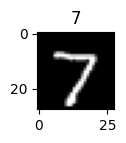

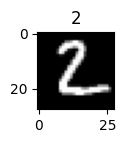

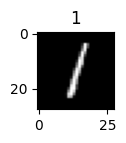

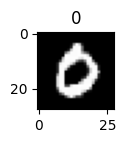

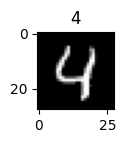

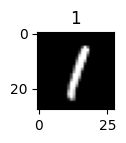

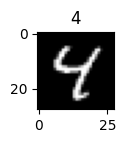

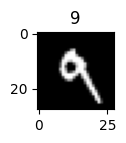

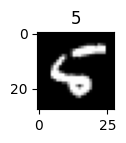

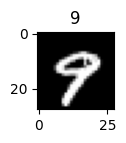

In [21]:
for x in range(10):
    images, labels = next(iter(test_loader))
    plt.figure(figsize=(2,1))
    plt.imshow(images[x].squeeze(), cmap='gray')
    plt.title(f'{labels[x].item()}')
    plt.show()

In [23]:
## 손실함수와 옵티마이저 설정
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

In [25]:
# 모델 학습
num_epoch = 10
for epoch in range(num_epoch):
    for inputs, labels in train_loader:
        optimizer.zero_grad()               # 미분할 때 0으로 초기화
        outputs = model(inputs)             # outputs 는 어떤 결과?? -> 0~9 꺼자 슛저애 햐덩허눈 예측 결과
        loss = criterion(outputs, labels)   # 예측 결과와 실제 결과를 비교해서 손실값 계산
        loss.backward()                     # 오차 역전파
        optimizer.step()                   # 파라미터(가중치) 업데이트
    print(f"Epoch {epoch+1}, loss : {loss.item()}", loss)

Epoch 1, loss : 0.01167317759245634 tensor(0.0117, grad_fn=<NllLossBackward0>)
Epoch 2, loss : 0.12501144409179688 tensor(0.1250, grad_fn=<NllLossBackward0>)
Epoch 3, loss : 0.14304836094379425 tensor(0.1430, grad_fn=<NllLossBackward0>)
Epoch 4, loss : 0.06905068457126617 tensor(0.0691, grad_fn=<NllLossBackward0>)
Epoch 5, loss : 0.012763372622430325 tensor(0.0128, grad_fn=<NllLossBackward0>)
Epoch 6, loss : 0.00012847907782997936 tensor(0.0001, grad_fn=<NllLossBackward0>)
Epoch 7, loss : 0.0034947351086884737 tensor(0.0035, grad_fn=<NllLossBackward0>)
Epoch 8, loss : 0.01749272644519806 tensor(0.0175, grad_fn=<NllLossBackward0>)
Epoch 9, loss : 0.16432534158229828 tensor(0.1643, grad_fn=<NllLossBackward0>)
Epoch 10, loss : 0.0020072762854397297 tensor(0.0020, grad_fn=<NllLossBackward0>)


In [29]:
## 3. CNN Model 만들기
model_gpu = nn.Sequential(
    # 첫 번째 컨볼루션 레이어
    nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride= 1, padding= 2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size= 2, stride= 2),

    # 두 번째 컨볼루션 레이어
    nn.Conv2d(in_channels=16, out_channels= 32, kernel_size= 5, stride= 1, padding= 2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size= 2, stride= 2),

    nn.Flatten(), # Data 1차원으로 완전 펴기
    
    # 완전 연결 레이어 만들기
    nn.Linear(32 * 7 * 7, 120),
    nn.ReLU(),
    nn.Linear(120, 10)
)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

In [31]:
device = torch.device("cuda")
print(device)

cuda


In [32]:
model_gpu.to(device) # Model 을 GPU 로

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1568, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=10, bias=True)
)

In [57]:
num_epochs = 50
for epoch in range(num_epochs):  # 학습 데이터셋을 여러 번 반복합니다.
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # 그래디언트 버퍼를 0으로 초기화
        outputs = model_gpu(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파, 그래디언트 계산
        optimizer.step()  # 파라미터 업데이트

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 2.318960189819336
Epoch 2, Loss: 2.3101248741149902
Epoch 3, Loss: 2.3328697681427
Epoch 4, Loss: 2.2901902198791504
Epoch 5, Loss: 2.3172452449798584
Epoch 6, Loss: 2.3171865940093994
Epoch 7, Loss: 2.3031935691833496
Epoch 8, Loss: 2.2982969284057617
Epoch 9, Loss: 2.333292245864868
Epoch 10, Loss: 2.297666311264038
Epoch 11, Loss: 2.3350470066070557
Epoch 12, Loss: 2.3108463287353516
Epoch 13, Loss: 2.3310728073120117
Epoch 14, Loss: 2.2994942665100098
Epoch 15, Loss: 2.3108832836151123
Epoch 16, Loss: 2.3200325965881348
Epoch 17, Loss: 2.3124594688415527
Epoch 18, Loss: 2.327131509780884
Epoch 19, Loss: 2.3142271041870117
Epoch 20, Loss: 2.3093981742858887
Epoch 21, Loss: 2.293856620788574
Epoch 22, Loss: 2.3226358890533447
Epoch 23, Loss: 2.2830281257629395
Epoch 24, Loss: 2.3286149501800537
Epoch 25, Loss: 2.273836612701416
Epoch 26, Loss: 2.341189384460449
Epoch 27, Loss: 2.2858526706695557
Epoch 28, Loss: 2.2962534427642822
Epoch 29, Loss: 2.32865309715271
Epoch 

In [58]:
model.eval()

images, labels = next(iter(test_loader))

In [59]:
images[0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [60]:
tmp_image = images[0].unsqueeze(0)
tmp_image.shape

torch.Size([1, 1, 28, 28])

In [61]:
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    logits = model_gpu(images[0].unsqueeze(0)) # 첫 번째 이미지에 대한 모델의 출력
    predicted_label = torch.argmax(logits, dim= 1)

In [62]:
logits

tensor([[ 0.0860, -0.0145, -0.0247, -0.1580,  0.0519,  0.1036, -0.0713,  0.1553,
          0.0314,  0.0557]], device='cuda:0')

In [63]:
predicted_label

tensor([7], device='cuda:0')

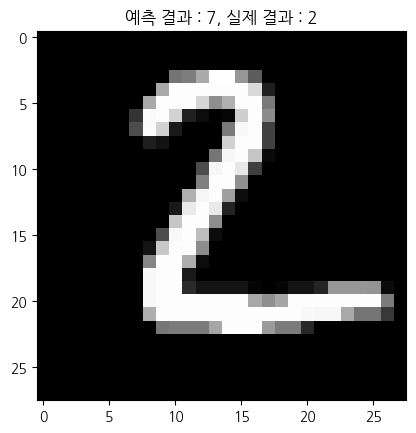

In [64]:
plt.imshow(images[1].cpu().squeeze(), cmap= 'gray')
plt.title(f"예측 결과 : {predicted_label.item()}, 실제 결과 : {labels[1].item()}")
plt.show()